In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("experiments_statistics.csv", index_col=0)
data

,algorithm,data_set,silhouette_mean,silhouette_std,purity_mean,purity_std,duration_mean,duration_std
0,kmeans,glass.csv,0.535646,6.035793e-04,0.843925,2.060318e-02,5.344305,1.328480
1,kmeans,processed-heart.csv,0.247618,1.080663e-02,0.542904,3.381832e-03,2.680258,1.137224
2,kmeans,user-knowledge.csv,0.194700,9.722748e-03,0.587097,5.073456e-02,2.347673,0.607296
3,kmeans,processed_breast_cancer.csv,0.269665,5.644518e-02,0.710108,7.581227e-03,0.749151,0.240572
4,ahc,glass.csv,0.089589,0.000000e+00,0.672897,0.000000e+00,0.067318,0.001102
5,ahc,processed-heart.csv,0.185735,0.000000e+00,0.544554,1.110223e-16,0.182316,0.000796
6,ahc,user-knowledge.csv,0.034767,0.000000e+00,0.330025,0.000000e+00,0.450862,0.005260
7,ahc,processed_breast_cancer.csv,0.412397,0.000000e+00,0.711191,0.000000e+00,0.152901,0.006610
8,affinity,glass.csv,0.564930,5.185098e-02,0.903271,5.233019e-02,0.052202,0.002985
9,affinity,processed-heart.csv,0.287238,5.551115e-17,0.564356,1.110223e-16,0.015314,0.000459


## Indice da Silhueta

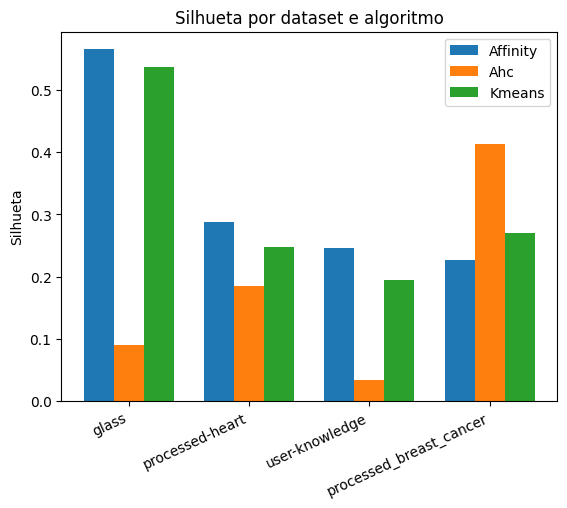

In [3]:
silhouettes = data[["algorithm", "data_set", "silhouette_mean"]]
grouped_data = silhouettes.groupby("algorithm")
fig, ax = plt.subplots()

# Plot
data_sets = silhouettes["data_set"].unique()
x = np.arange(len(data_sets))
width = 0.25
multiplier = 0

for algorithm, group in grouped_data:
    offset = width * multiplier
    ax.bar(x + offset, group["silhouette_mean"], width, label=algorithm.capitalize())
    multiplier += 1

ax.set_ylabel("Silhueta")
ax.set_title("Silhueta por dataset e algoritmo")
ax.set_xticks(x + width * (multiplier - 1) / 2, [d.split(".csv")[0] for d in data_sets])
ax.legend()
plt.xticks(rotation=25, ha="right")
plt.show()

## Indice de Pureza

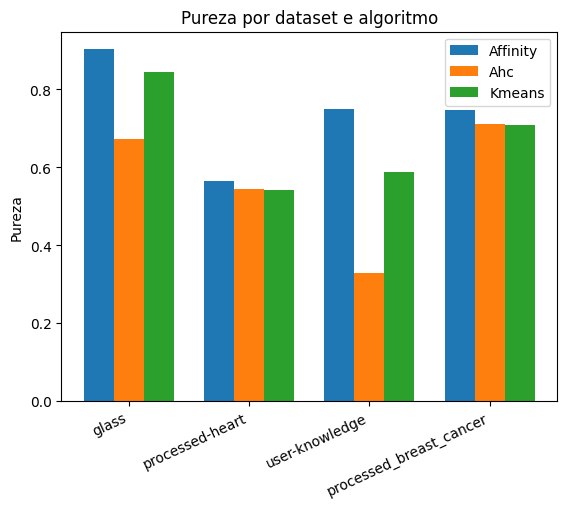

In [4]:
purities = data[["algorithm", "data_set", "purity_mean"]]

# Plot
grouped_data = purities.groupby("algorithm")
fig, ax = plt.subplots()

data_sets = purities["data_set"].unique()
x = np.arange(len(data_sets))
width = 0.25
multiplier = 0

for algorithm, group in grouped_data:
    offset = width * multiplier
    ax.bar(x + offset, group["purity_mean"], width, label=algorithm.capitalize())
    multiplier += 1

ax.set_ylabel("Pureza")
ax.set_title("Pureza por dataset e algoritmo")
ax.set_xticks(x + width * (multiplier - 1) / 2, [d.split(".csv")[0] for d in data_sets])
ax.legend()
plt.xticks(rotation=25, ha="right")
plt.show()


## Duração

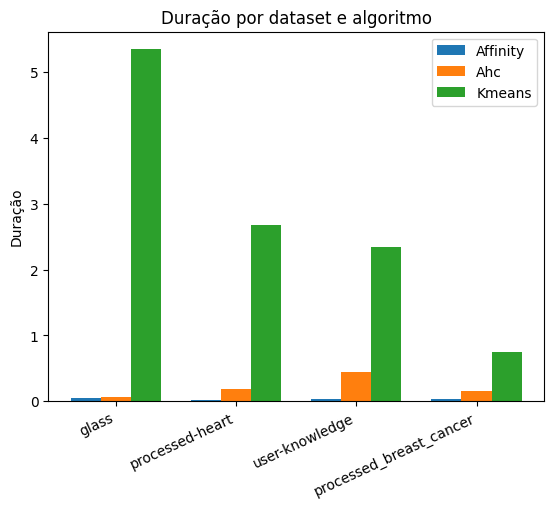

In [5]:
durations = data[["algorithm", "data_set", "duration_mean"]]

# Plot
grouped_data = durations.groupby("algorithm")
fig, ax = plt.subplots()

data_sets = durations["data_set"].unique()
x = np.arange(len(data_sets))
width = 0.25
multiplier = 0

for algorithm, group in grouped_data:
    offset = width * multiplier
    ax.bar(x + offset, group["duration_mean"], width, label=algorithm.capitalize())
    multiplier += 1

ax.set_ylabel("Duração")
ax.set_title("Duração por dataset e algoritmo")
ax.set_xticks(x + width * (multiplier - 1) / 2, [d.split(".csv")[0] for d in data_sets])
ax.legend()
plt.xticks(rotation=25, ha="right")
plt.show()
